In [1]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']


# Do not hide any columns
pd.set_option('display.max_columns', None)

results_path = 'results_combined'
images_dir = f'{results_path}/images'
results_list = []
recover_list = [] 

# Read all the results from results/ directory
for dirs in os.listdir(results_path):
    results = {}
    recover = {}
    if 'results' in dirs:
        if not os.path.isdir(f'{results_path}/{dirs}'):
            continue
        for file in os.listdir(f'{results_path}/{dirs}/results'):
            if file.endswith('.feather') and '__9' not in dirs:
                number = int(file.split('_')[0])
                res_pd = pd.read_feather(f'{results_path}/{dirs}/results/{file}')
                rec_pd = pd.read_feather(f'{results_path}/{dirs}/recover/{file}')
                
                res_pd = res_pd[res_pd['dataset_name'] != 'breast_cancer']
                rec_pd = rec_pd[rec_pd['dataset_name'] != 'breast_cancer']
                
                if '__9' in dirs:
                    res_pd = res_pd[res_pd['base_counterfactual_time'].isna()]
                
                results[number] = res_pd
                recover[number] = rec_pd
                
                

    sorted_keys = sorted(results.keys()) 
    for k in sorted_keys:
        results_list.append(results[k])
        recover_list.append(recover[k])
    
    print(f'Processed {dirs} directory')
    # break
    
# Concatenate all the results
raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
recover_df: pd.DataFrame = pd.concat(recover_list, ignore_index=True)
# print(recover_df.info())
raw_df.head(3)

Processed results_wine1__9 directory
Processed results_breast1 directory
Processed results_breast2__9 directory
Processed robx directory
Processed results_fico2 directory
Processed results_breast2 directory
Processed results_breast1__9 directory
Processed results_fico1__9 directory
Processed results_fico2__9 directory
Processed results_wine1 directory
Processed results_fico1 directory
Processed images directory
Processed results_wine2 directory
Processed results_wine2__9 directory


,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta
0,Seed-Architecture,fico,32,0,Seed-Architecture,0.95,0.5,Model2_0,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.088027,0,0.118728,0,"[0.42316228322143384, 0.5902224921053054, 0.11...",0.537076,1.0,0.550801,1.0,1.0,3.181537,0.836189,0.768268,0.533333,1.0,0.014567,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Seed-Architecture,fico,32,0,Seed-Architecture,0.95,0.5,Model2_0,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.088027,0,0.118728,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.42307306858971444, 0.5909860253154476, 0.11...",0.54029,1.0,0.55418,1.0,1.0,3.209884,0.84118,0.771598,0.533333,1.0,0.039621,0.000115,2.160914,0.0,0.0,0.0,0.0,0.516128,0.516128,0.826645
2,Seed-Architecture,fico,32,0,Seed-Architecture,0.95,0.5,Model2_1,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.088027,0,0.128949,0,"[0.42316228322143384, 0.5902224921053054, 0.11...",0.537076,1.0,0.509835,1.0,1.0,3.181537,0.836189,0.768268,0.533333,1.0,0.014567,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# import scipy.stats as stats

# lb = 0.516128
# ub = 0.826645
# alpha = 0.95
# k = 32
# prior_a = 0.5
# prior_b = 0.5

# def find_beta_params(lb, ub, alpha, k, prior_a, prior_b):
#     # Find parameters of the beta distribution that result in the given credible interval
#     for a in range(k):
#         b = k - a
#         lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)
        
#         if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#             # print(f'Found a = {a}, b = {b}')
#             break
        
#     return a, b

# # find_beta_params(lb, ub, alpha, k, prior_a, prior_b)

# lbs = raw_df['lower_bound_beta']
# ubs = raw_df['upper_bound_beta']

# import multiprocessing


# def mp_find_beta_params(lb: list, ub: list, alpha: float, k: int, prior_a: float, prior_b: float, workers: int = 4):
    
#     def find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b):
        
#         r = []
#         for i, (lb, ub) in enumerate(zip(lbs, ubs)):
#             # Find parameters of the beta distribution that result in the given credible interval
#             for a in range(k):
#                 b = k - a
#                 lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)

#                 if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#                     r.append((a, b))
#                     break
#             if i % 1000 == 0:
#                 print(f'Processed {i} elements')
#         return r
    
#     processes = []
    
#     for i in range(workers):
#         n = len(lb)
#         chunks = np.array_split(np.arange(n), workers)
        
#         lb_part = lb[chunks[i]]
#         ub_part = ub[chunks[i]]
        
#         print(f'Processing {len(lb_part)} elements')
        
#         p = multiprocessing.Process(target=find_beta_params, args=(lb_part, ub_part, alpha, k, prior_a, prior_b))
#         processes.append(p)
#         p.start()
        
#     results = []
    
#     for p in processes:
#         p.join()
#         results.append(p)
    
#     return results

# results = mp_find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b, workers=4)

# raw_df['beta_alpha'], raw_df['beta_beta'] = zip(*results)


# raw_df['beta_alpha'] = raw_df['beta_alpha'].astype(int)
# raw_df['beta_beta'] = raw_df['beta_beta'].astype(int)

# raw_df['beta_alpha'].value_counts()

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

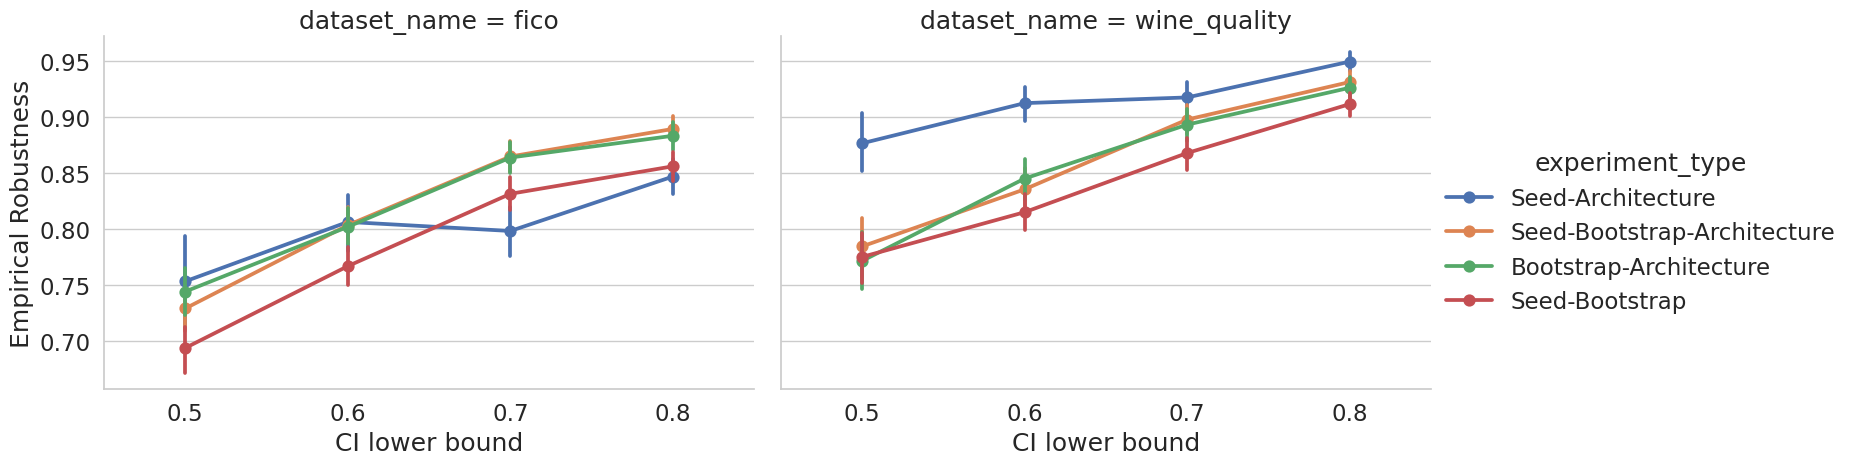

In [3]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = raw_df.copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)

sns.set_theme(style='whitegrid', font_scale=1.5)

sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
)

plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

/tmp/ipykernel_4920/3681368201.py:76: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


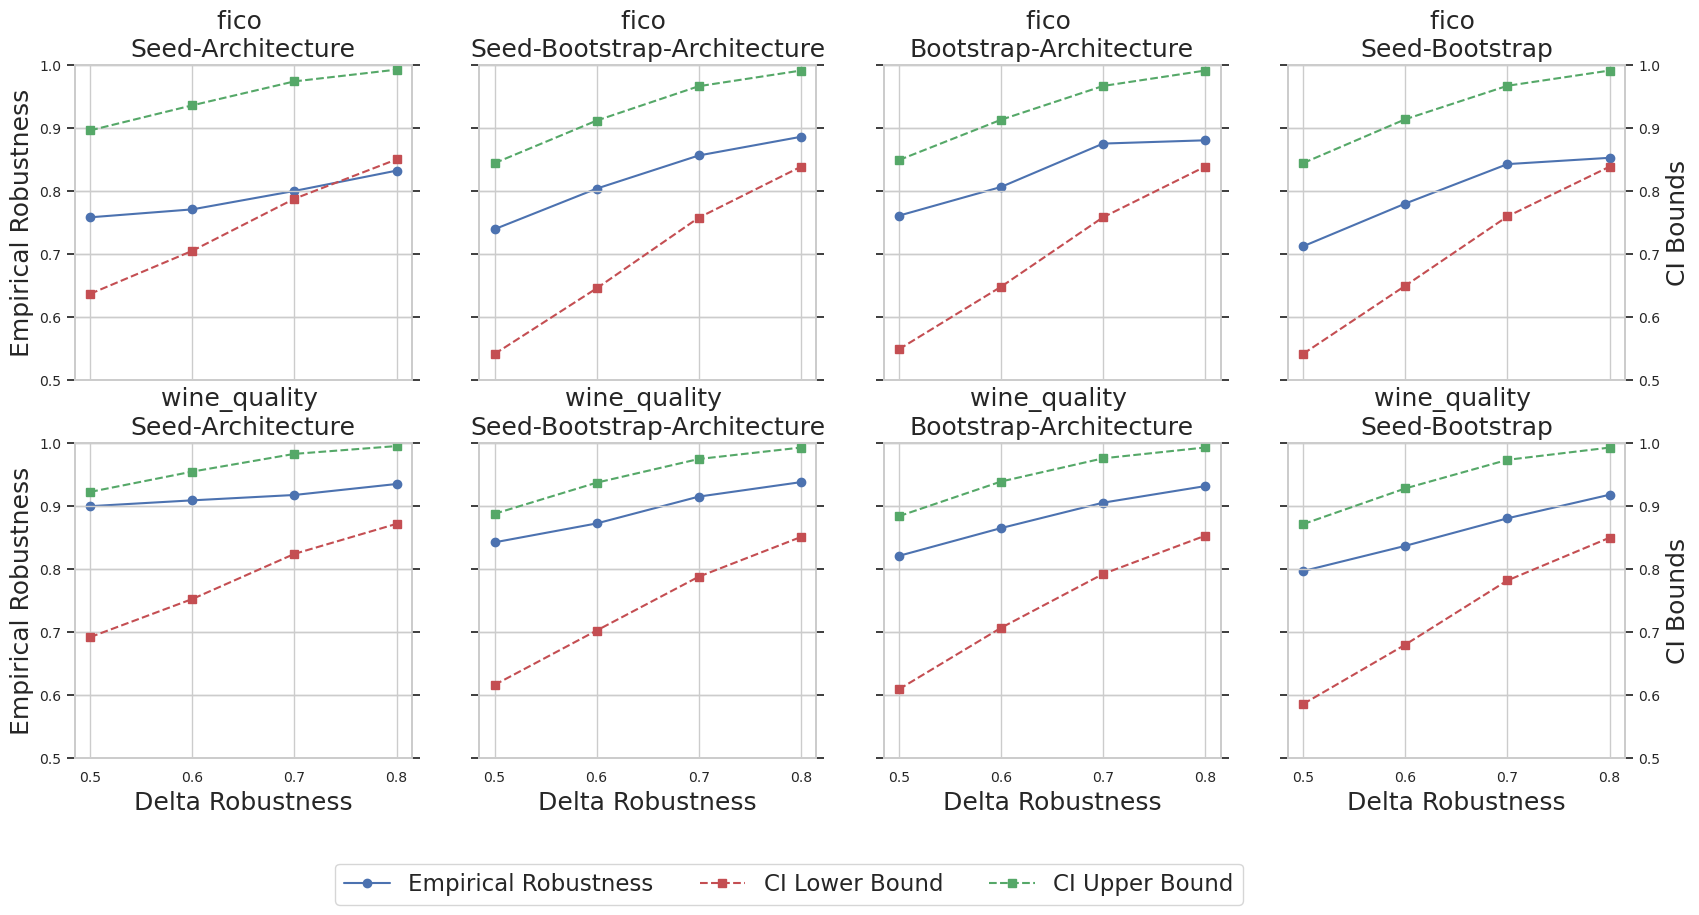

In [4]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

datasets = raw_df['dataset_name'].unique()
experiment_types = raw_df['experiment_type'].unique()
delta_robustness = raw_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(experiment_types), figsize=(20, 9), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df = raw_df[(raw_df['dataset_name'] == dataset) & (raw_df['experiment_type'] == experiment_type)]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        ax.set_title(f'{dataset} \n{experiment_type}')
        
        if i == len(datasets) - 1:
            ax.set_xlabel('Delta Robustness')
        # ax.set_xlabel('Delta Robustness')
        if j == 0:
            ax.set_ylabel('Empirical Robustness')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        
        if j == len(experiment_types) - 1:
            ax2.set_ylabel('CI Bounds')
        
        
        l = 0.5
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        # Make x-axis labels more coarse i.e. only show rounded to tenths
        ax_lim = ax.get_xlim()
        ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
        

        if i == 1 and j == 0:
            ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
            ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
            
            ax.legend(ax_legend_handles + ax2_legend_handles, ax_legend_labels + ax2_legend_labels, ncol=3, bbox_to_anchor=(3.5, -0.3))
            
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
            
        


plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [5]:
resultsrobx = []

tobx_results_path = 'results_combined' + '/robx'

results_list = []
recover_list = []

for dirs in os.listdir(tobx_results_path):
    results = {}
    recover = {}
    if 'results' in dirs:
        for file in os.listdir(f'{tobx_results_path}/{dirs}/results/'):
            # print(file)
            if file.endswith('.feather'):
                number = int(file.split('_')[0])
                res = pd.read_feather(f'{tobx_results_path}/{dirs}/results/{file}')
                rec = pd.read_feather(f'{tobx_results_path}/{dirs}/recover/{file}')
                
                res[['beta_confidence', 'delta_robustness']] = rec[['beta_confidence', 'delta_robustness']]

                results[number] = res
                recover[number] = rec
                
    sorted_keys = sorted(results.keys())
    for k in sorted_keys:
        results_list.append(results[k])
        recover_list.append(recover[k])

# Concatenate all the results
robx_raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
robx_recover_df: pd.DataFrame = pd.concat(recover_list, ignore_index=True)

# Rename beta_confidence to tau and delta_robustness to variance
robx_raw_df = robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'})
robx_recover_df = robx_recover_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'})
robx_raw_df.head(5)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,tau,variance,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time
0,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_0,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.145639,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.452049,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.5107405833305784, 0.3596986895464249, 0.070...",0.592979,1.0,0.539607,1.0,1.0,2.397353,0.574735,0.546697,0.600000,1.0,1.039486,0.086727,0.511540
1,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_1,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.042922,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.379078,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.4884297079741469, 0.3613443941234107, 0.072...",0.575650,1.0,0.606881,1.0,1.0,2.377855,0.574931,0.571576,0.466667,1.0,0.819136,0.053856,0.271883
2,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_2,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.093227,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.668090,1,1,2.491266,0.632239,0.68463,0.4,1,0.014776,"[0.46237201566645453, 0.3571173577282633, 0.08...",0.586333,1.0,0.655356,1.0,1.0,2.273342,0.587042,0.583303,0.400000,1.0,0.842353,0.069818,0.281920
3,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_3,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.150411,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.457429,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.46237201566645453, 0.3571173577282633, 0.08...",0.586333,1.0,0.527740,1.0,1.0,2.273342,0.587042,0.583303,0.400000,1.0,0.842353,0.069818,0.431172
4,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_4,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.101947,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.376229,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.4884297079741469, 0.3613443941234107, 0.072...",0.575650,1.0,0.484310,0.0,1.0,2.377855,0.574931,0.571576,0.466667,0.0,0.819136,0.053856,0.436559


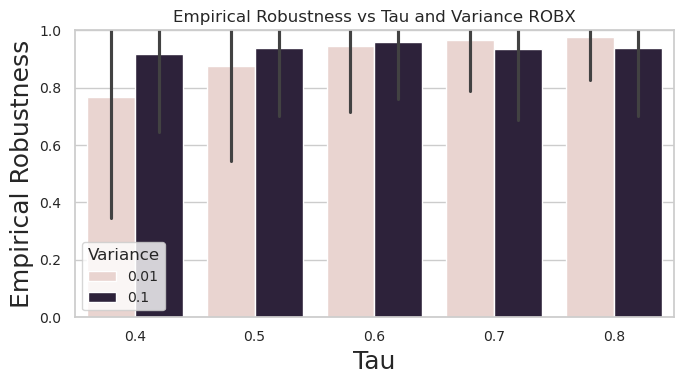

In [6]:
fig, ax = plt.subplots(figsize=(7, 4))
# Change font size
sns.set_theme(style='whitegrid', font_scale=1)
sns.barplot(data=robx_raw_df, x='tau', y='robust_counterfactual_validity_model2', hue='variance', errorbar='sd')
plt.title('Empirical Robustness vs Tau and Variance ROBX')
plt.ylabel('Empirical Robustness')
plt.xlabel('Tau')
plt.ylim(0, 1)

# Change font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Change legend font size
plt.legend(fontsize=10, title='Variance')

plt.tight_layout()
plt.savefig(f'{images_dir}/3_empirical_robustness_vs_tau_variance.png', dpi=300, bbox_inches='tight')

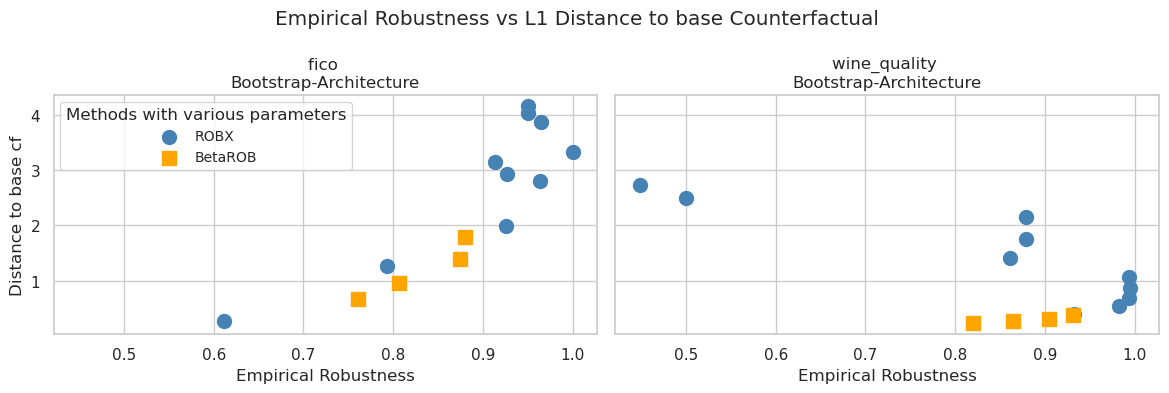

In [67]:


datasets = robx_raw_df['dataset_name'].unique()
datasets = datasets[datasets != 'breast_cancer']
experiment_types = robx_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=len(datasets), nrows=len(experiment_types), figsize=(12, 4), sharex=True, sharey=True)

# sns.set_theme(style='whitegrid', font_scale=1)

ax = axes.flatten()

for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        ite = i * len(experiment_types) + j
        
        tmp_robx_df = robx_raw_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_validity_model2'].mean().reset_index()
        robx_agg_dist_to_baseline = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()
        
        tmp_raw_df = raw_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_validity_model2'].mean().reset_index()  
        betarob_agg_dist_to_baseline = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()


        # Create scatter plot of dist vs empirical for both ROBX and BetaROB
        robx_merge = pd.merge(robx_agg_empirical, robx_agg_dist_to_baseline, on=['tau', 'variance'], suffixes=('_empirical', '_dist'))
        robx_merge['tau_var'] = robx_merge['tau'].astype(str) + '_' + robx_merge['variance'].astype(str)

        betarob_merge = pd.merge(betarob_agg_empirical, betarob_agg_dist_to_baseline, left_on=['delta_robustness', 'beta_confidence'], right_on=['delta_robustness', 'beta_confidence'], suffixes=('_empirical', '_dist'))
        betarob_merge['delta_beta'] = betarob_merge['delta_robustness'].astype(str) + '_' + betarob_merge['beta_confidence'].astype(str)
        
        ax[ite].scatter(x=robx_merge['robust_counterfactual_validity_model2'],
                    y=robx_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='steelblue',
                    marker='o',
                    s=100,
                    # cmap='tab10',
                    label='ROBX'
        )
        
        ax[ite].scatter(x=betarob_merge['robust_counterfactual_validity_model2'],
                    y=betarob_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='orange',
                    marker='s',
                    s=100,
                    # cmap='tab10',
                    label='BetaROB'
        )
        

        ax[ite].set_xlabel('Empirical Robustness')
        
        if j == 0:
            ax[ite].set_ylabel('Distance to base cf')
        ax[ite].set_title(f'{dataset} \n{experiment_type}')
        
        if i == 0 and j == 0:
            ax[ite].legend(title='Methods with various parameters', fontsize=10)
            
            
        # # Add labels to the points
        # for k, row in robx_merge.iterrows():
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.04, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'], 
        #                  row['tau'], 
        #                  fontsize=9, 
        #                  alpha=0.5
        #     )
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.02, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'], 
        #                  row['variance'], 
        #                  fontsize=9, 
        #                  alpha=0.5
        #     )
        # for k, row in betarob_merge.iterrows():
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.035, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'], 
        #                  row['delta_robustness'], 
        #                  fontsize=9, 
        #                  alpha=0.9,
        #                  color='#ffa500',
        #     )
        #     ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.01, 
        #                  row['robust_counterfactual_L1_distance_from_base_cf'] , 
        #                  row['beta_confidence'], 
        #                  fontsize=9, 
        #                  alpha=0.9,
        #                 color='#ffa500',
        #     )
            


plt.suptitle('Empirical Robustness vs L1 Distance to base Counterfactual')
plt.tight_layout()

plt.savefig(f'{images_dir}/3_empirical_robustness_vs_l1_distance.png', dpi=300, bbox_inches='tight')


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [68]:
resultsrobx = []

conf_sweep_results_path = 'results_combined' + '/conf_sweep'

results_list = []

for dirs in os.listdir(conf_sweep_results_path):
    results = {}
    if 'results' in dirs:
        for file in os.listdir(f'{conf_sweep_results_path}/{dirs}/results/'):
            # print(file)
            if file.endswith('.feather'):
                number = int(file.split('_')[0])
                res = pd.read_feather(f'{conf_sweep_results_path}/{dirs}/results/{file}')
                results[number] = res
                
    sorted_keys = sorted(results.keys())
    for k in sorted_keys:
        results_list.append(results[k])

# Concatenate all the results
conf_raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
conf_raw_df.head(5)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta
0,Bootstrap-Architecture,wine_quality,32,0,Bootstrap-Architecture,0.7,0.7,Model2_0,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.129953,0,"[0.3138899579022423, 0.30970341186460115, 0.04...",0.596364,1,0.498493,0,1,0.485619,0.170675,0.137108,0.6,0,0.003142,"[0.2802287911586734, 0.2618043156402583, 0.048...",0.758575,1.0,0.818455,1.0,1.0,0.709990,0.248162,0.156719,0.666667,1.0,0.396293,0.022084,1.900120,0.0,0.0,0.0,0.0,0.839497,0.839497,0.946823
1,Bootstrap-Architecture,wine_quality,32,0,Bootstrap-Architecture,0.7,0.7,Model2_1,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.111764,0,"[0.3138899579022423, 0.30970341186460115, 0.04...",0.596364,1,0.316460,0,1,0.485619,0.170675,0.137108,0.6,0,0.003142,"[0.33441605744315683, 0.2583679727196671, 0.05...",0.793812,1.0,0.770481,1.0,1.0,0.726594,0.256330,0.203522,0.666667,1.0,0.355555,0.021769,1.895805,0.0,0.0,0.0,0.0,0.839497,0.839497,0.946823
2,Bootstrap-Architecture,wine_quality,32,0,Bootstrap-Architecture,0.7,0.7,Model2_2,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.178763,0,"[0.3138899579022423, 0.30970341186460115, 0.04...",0.596364,1,0.402749,0,1,0.485619,0.170675,0.137108,0.6,0,0.003142,"[0.3047372366351006, 0.26998541756032096, 0.05...",0.739243,1.0,0.607420,1.0,1.0,0.591020,0.212586,0.161588,0.600000,1.0,0.294113,0.013632,1.897897,0.0,0.0,0.0,0.0,0.731587,0.731587,0.873302
3,Bootstrap-Architecture,wine_quality,32,0,Bootstrap-Architecture,0.7,0.7,Model2_3,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.171962,0,"[0.3138899579022423, 0.30970341186460115, 0.04...",0.596364,1,0.377796,0,1,0.485619,0.170675,0.137108,0.6,0,0.003142,"[0.3465614214754624, 0.22914495688486, -0.0320...",0.811478,1.0,0.650609,1.0,1.0,0.707093,0.258341,0.227636,0.666667,1.0,0.401051,0.023408,1.898264,0.0,0.0,0.0,0.0,0.731587,0.731587,0.873302
4,Bootstrap-Architecture,wine_quality,32,0,Bootstrap-Architecture,0.7,0.7,Model2_4,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.176243,0,"[0.3138899579022423, 0.30970341186460115, 0.04...",0.596364,1,0.411153,0,1,0.485619,0.170675,0.137108,0.6,0,0.003142,"[0.25777398985612543, 0.29188780245038315, 0.0...",0.800336,1.0,0.686948,1.0,1.0,0.731649,0.258447,0.175243,0.600000,1.0,0.394811,0.018943,1.895494,0.0,0.0,0.0,0.0,0.766589,0.766589,0.898783


In [69]:
conf_raw_df['beta_confidence'].value_counts()

0.70    11970
0.80    11956
0.90    11925
0.95    11925
0.99    11925
Name: beta_confidence, dtype: int64

In [70]:
conf_raw_df['delta_robustness'].value_counts()

0.7    19905
0.8    19905
0.9    19891
Name: delta_robustness, dtype: int64

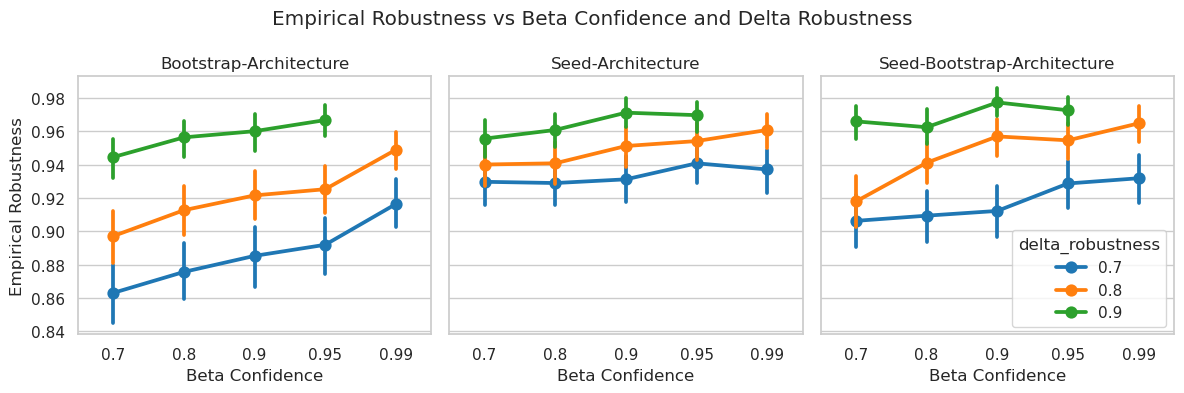

In [82]:
experiments = conf_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=len(experiments), figsize=(12, 4), sharex=True, sharey=True)

for i, experiment in enumerate(experiments):
    
    tmp_conf_df = conf_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df['experiment_type'] == experiment]
    
    sns.pointplot(data=tmp_conf_df, 
                  x='beta_confidence', 
                  y='robust_counterfactual_validity_model2', 
                  hue='delta_robustness', 
                  ax=axes[i],
                  palette='tab10',
                  legend=True if i == len(experiments) - 1 else False
    )
    
    axes[i].set_title(experiment)
    axes[i].set_xlabel('Beta Confidence')
    if i == 0:
        axes[i].set_ylabel('Empirical Robustness')
        
    plt.suptitle('Empirical Robustness vs Beta Confidence and Delta Robustness')
    
plt.tight_layout()
plt.savefig(f'{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png', dpi=300, bbox_inches='tight')
    
   

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (confidence sweep)</div>

In [83]:
k_sweep_results_path = 'results_combined' + '/k_sweep'

results_list = []

for dirs in os.listdir(k_sweep_results_path):
    results = {}
    if 'results' in dirs:
        for file in os.listdir(f'{k_sweep_results_path}/{dirs}/results/'):
            # print(file)
            if file.endswith('.feather'):
                number = int(file.split('_')[0])
                res = pd.read_feather(f'{k_sweep_results_path}/{dirs}/results/{file}')
                results[number] = res
                
    sorted_keys = sorted(results.keys())
    for k in sorted_keys:
        results_list.append(results[k])

# Concatenate all the results
k_raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
k_raw_df.head(5)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta
0,Bootstrap-Architecture,wine_quality,16,0,Bootstrap-Architecture,0.95,0.5,Model2_0,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.160103,0,"[0.314758347939353, 0.41150118396585844, 0.005...",0.528478,1,0.286537,0,1,0.34614,0.135878,0.151154,0.466667,0,0.003407,"[0.27341007583234433, 0.38410224912591684, -0....",0.660783,1.0,0.466738,0.0,1.0,0.570223,0.223284,0.195661,0.533333,0.0,0.378823,0.018798,1.080615,0.0,0.0,0.0,0.0,0.579215,0.579215,0.944187
1,Bootstrap-Architecture,wine_quality,16,0,Bootstrap-Architecture,0.95,0.5,Model2_1,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.199848,0,"[0.314758347939353, 0.41150118396585844, 0.005...",0.528478,1,0.370788,0,1,0.34614,0.135878,0.151154,0.466667,0,0.003407,"[0.3040353923695003, 0.3603550490109437, -0.04...",0.677815,1.0,0.518126,1.0,1.0,0.548145,0.180802,0.183978,0.400000,1.0,0.326457,0.012484,1.070900,0.0,0.0,0.0,0.0,0.655824,0.655824,0.973087
2,Bootstrap-Architecture,wine_quality,16,0,Bootstrap-Architecture,0.95,0.5,Model2_2,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.027479,0,"[0.314758347939353, 0.41150118396585844, 0.005...",0.528478,1,0.731413,1,1,0.34614,0.135878,0.151154,0.466667,1,0.003407,"[0.3220203975187425, 0.4145754226166931, 0.000...",0.682284,1.0,0.660490,1.0,1.0,0.530784,0.204084,0.199811,0.466667,1.0,0.239241,0.009416,0.550023,0.0,0.0,0.0,0.0,0.509271,0.509271,0.909172
3,Bootstrap-Architecture,wine_quality,16,0,Bootstrap-Architecture,0.95,0.5,Model2_3,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.180947,0,"[0.314758347939353, 0.41150118396585844, 0.005...",0.528478,1,0.299993,0,1,0.34614,0.135878,0.151154,0.466667,0,0.003407,"[0.3150278854534853, 0.389303683308969, -0.029...",0.676082,1.0,0.441758,0.0,1.0,0.499030,0.180341,0.167059,0.533333,0.0,0.251597,0.008295,0.547799,0.0,0.0,0.0,0.0,0.655824,0.655824,0.973087
4,Bootstrap-Architecture,wine_quality,16,0,Bootstrap-Architecture,0.95,0.5,Model2_4,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.197192,0,"[0.314758347939353, 0.41150118396585844, 0.005...",0.528478,1,0.338948,0,1,0.34614,0.135878,0.151154,0.466667,0,0.003407,"[0.3542838563232612, 0.3761086932075356, 0.043...",0.714244,1.0,0.471840,0.0,1.0,0.553348,0.182237,0.166979,0.666667,0.0,0.318121,0.010862,1.065036,0.0,0.0,0.0,0.0,0.579215,0.579215,0.944187


In [87]:
k_raw_df['delta_robustness'].value_counts()

0.5    12810
0.6    12810
0.7    12810
0.8    12791
0.9    12780
Name: delta_robustness, dtype: int64

In [88]:
k_raw_df['k_mlps_in_B'].value_counts()

16    13500
24    13500
32    13500
36    13500
40    10001
Name: k_mlps_in_B, dtype: int64

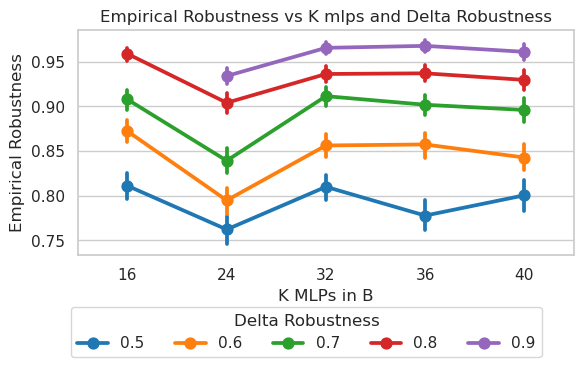

In [99]:


fig, axes = plt.subplots(figsize=(6, 4))

sns.pointplot(data=k_raw_df,
                x='k_mlps_in_B',
                y='robust_counterfactual_validity_model2',
                hue='delta_robustness',
                palette='tab10',
                ax=axes
)

plt.legend(title='Delta Robustness', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.title('Empirical Robustness vs K mlps and Delta Robustness')
plt.xlabel('K MLPs in B')
plt.ylabel('Empirical Robustness')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_empirical_robustness_vs_k_mlps.png', dpi=300, bbox_inches='tight')



<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [100]:
generalization_results_path = 'results_combined' + '/generalization'

results_list = []

for dirs in os.listdir(generalization_results_path):
    results = {}
    if 'results' in dirs:
        for file in os.listdir(f'{generalization_results_path}/{dirs}/results/'):
            # print(file)
            if file.endswith('.feather'):
                number = int(file.split('_')[0])
                res = pd.read_feather(f'{generalization_results_path}/{dirs}/results/{file}')
                results[number] = res
                
    sorted_keys = sorted(results.keys())
    for k in sorted_keys:
        results_list.append(results[k])
        
# Concatenate all the results
gen_raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
gen_raw_df.head(5)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta
0,Seed,wine_quality,32,0,Seed,0.95,0.6,Model2_0,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.308078,0,"[0.36656797282888676, 0.40288616205387234, -0....",0.506104,1,0.506104,1,1,0.349123,0.123846,0.14149,0.2,1,0.003284,"[0.3849387080015078, 0.32444165960902965, 0.01...",0.743805,1,0.743805,1,1,0.522272,0.195301,0.189948,0.466667,1,0.341252,0.015104,1.940948,0,0,0,0,0.814280,0.814280,0.986785
1,Seed,wine_quality,32,0,Seed,0.95,0.6,Model2_1,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.308078,0,"[0.36656797282888676, 0.40288616205387234, -0....",0.506104,1,0.506104,1,1,0.349123,0.123846,0.14149,0.2,1,0.003284,"[0.3949019037971631, 0.34041315583895476, -0.0...",0.835125,1,0.835125,1,1,0.665624,0.249009,0.228629,0.800000,1,0.558739,0.043407,2.837431,0,0,0,0,0.925072,0.925072,0.999985
2,Seed,wine_quality,32,0,Seed,0.95,0.6,Model2_2,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.308078,0,"[0.36656797282888676, 0.40288616205387234, -0....",0.506104,1,0.506104,1,1,0.349123,0.123846,0.14149,0.2,1,0.003284,"[0.36343718209800807, 0.3544080668123646, -0.1...",0.718382,1,0.718382,1,1,0.671854,0.230363,0.222446,0.600000,1,0.413068,0.023746,1.885465,0,0,0,0,0.653705,0.653705,0.917732
3,Seed,wine_quality,32,0,Seed,0.95,0.6,Model2_3,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.308078,0,"[0.36656797282888676, 0.40288616205387234, -0....",0.506104,1,0.506104,1,1,0.349123,0.123846,0.14149,0.2,1,0.003284,"[0.42461241040858133, 0.31331498072118547, 0.0...",0.752473,1,0.752473,1,1,0.667066,0.232533,0.209105,0.400000,1,0.437348,0.027705,1.890816,0,0,0,0,0.925072,0.925072,0.999985
4,Seed,wine_quality,32,0,Seed,0.95,0.6,Model2_4,"[0.29166666666666674, 0.4133333333333333, 0.0,...",0,0.308078,0,0.308078,0,"[0.36656797282888676, 0.40288616205387234, -0....",0.506104,1,0.506104,1,1,0.349123,0.123846,0.14149,0.2,1,0.003284,"[0.3703095607918802, 0.35474893912899674, -0.0...",0.718051,1,0.718051,1,1,0.640606,0.202699,0.173502,0.600000,1,0.350364,0.014350,1.893751,0,0,0,0,0.690890,0.690890,0.937775


In [106]:
gen_raw_df['experiment_type'].value_counts()

Seed    10701
Name: experiment_type, dtype: int64

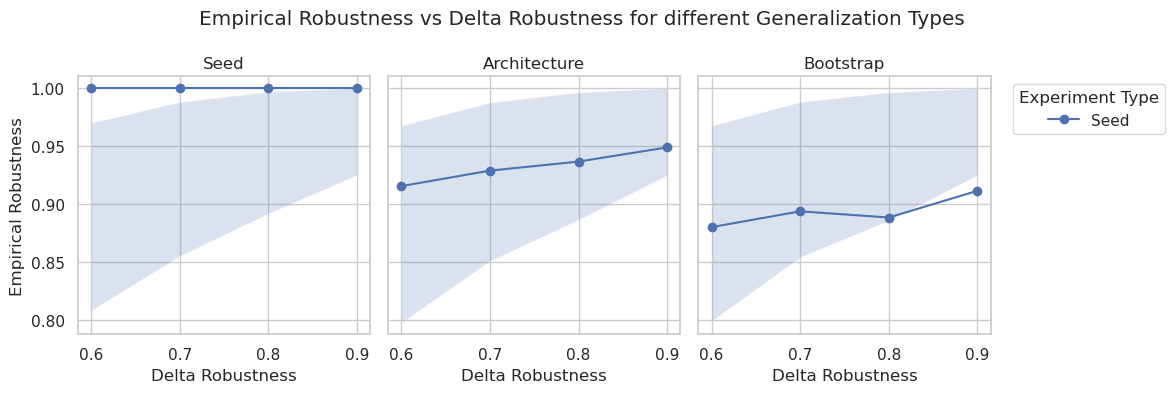

In [126]:
generalizations = gen_raw_df['experiment_generalization_type'].unique()
experiments = gen_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=len(generalizations), figsize=(12, 4), sharex=True, sharey=True)

for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[(tmp_gen_df['experiment_type'] == experiment) & (tmp_gen_df['experiment_generalization_type'] == gen)]

        lbs = tmp_gen_df['lower_bound_beta']
        ubs = tmp_gen_df['upper_bound_beta']
        
        tmp_grp = tmp_gen_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()

        axes[i].plot(tmp_grp.index, tmp_grp, marker='o', linestyle='-', label=experiment)
        
        tmp_grp_lower = tmp_gen_df.groupby('delta_robustness')['lower_bound_beta'].mean()
        tmp_grp_upper = tmp_gen_df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        axes[i].fill_between(tmp_grp.index, tmp_grp_lower, tmp_grp_upper, alpha=0.2)
        
        axes[i].set_title(gen)
        axes[i].set_xlabel('Delta Robustness')
        
        if i == 0:
            axes[i].set_ylabel('Empirical Robustness')
            
        if i == len(generalizations) - 1:
            axes[i].legend(title='Experiment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        
            
plt.suptitle('Empirical Robustness vs Delta Robustness for different Generalization Types')

plt.tight_layout()

plt.savefig(f'{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png', dpi=300, bbox_inches='tight')
        